# Project 4: Regression Analysis
## Part1 Load the dataset

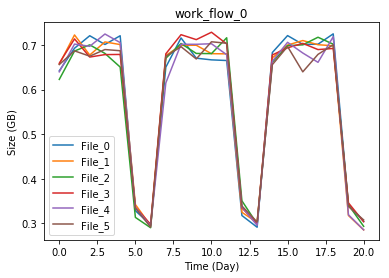

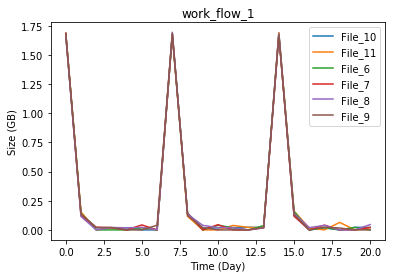

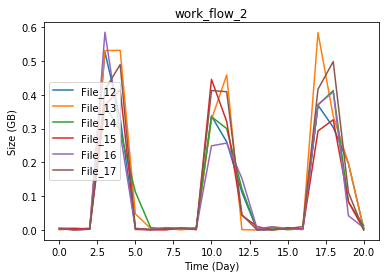

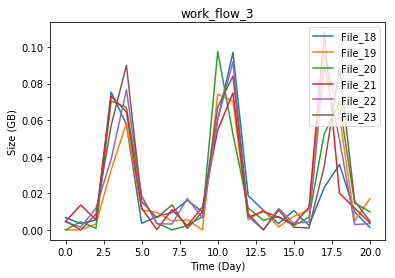

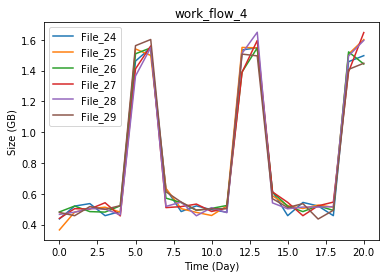

In [3]:
# q1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('network_backup_dataset.csv', sep=',')

df1 = df.replace({'Day of Week': {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4,
                                   'Saturday': 5, 'Sunday': 6}})
df1['Day_num'] = df1[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day']] \
    .apply(lambda x: (x['Week #'] - 1) * 7 + x['Day of Week'], axis=1)
df1 = df1[df1['Day_num'] <= 20]  # the first 20 days

df1 = df1.groupby('Work-Flow-ID')
for workflow_ID, group in df1:
    workflows = group.groupby('File Name')
    for file_name, workflow in workflows:
        
        Eachday= workflow.groupby('Day_num')
        DayBackup=Eachday['Size of Backup (GB)'].agg(np.sum)
        
        plt.plot(DayBackup, label=file_name)
        
    plt.xlabel('Time (Day)')
    plt.ylabel('Size (GB)')
    plt.legend(loc='best')
    plt.title(workflow_ID)
 
    plt.show()

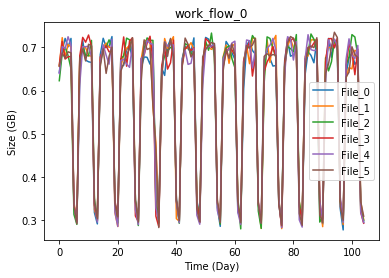

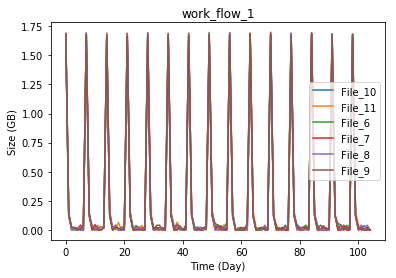

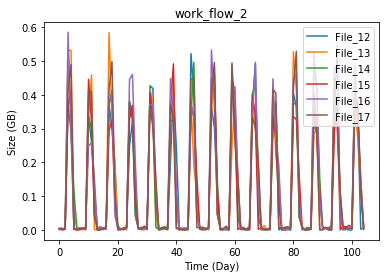

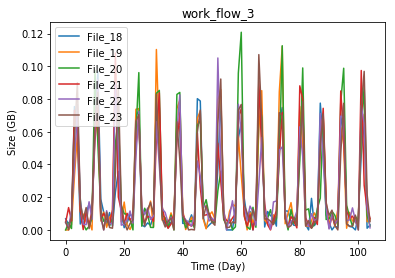

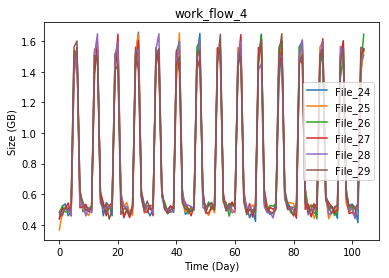

In [2]:
#2
df2 = df.replace({'Day of Week': {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4,
                                   'Saturday': 5, 'Sunday': 6}})
df2['Day_num'] = df2[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day']] \
    .apply(lambda x: (x['Week #'] - 1) * 7 + x['Day of Week'], axis=1)
df2 = df2[df2['Day_num'] <= 105]  # the first 105 days

df2 = df2.groupby('Work-Flow-ID')
for workflow_ID, group in df2:
    workflows = group.groupby('File Name')
    for file_name, workflow in workflows:
        Eachday= workflow.groupby('Day_num')
        DayBackup=Eachday['Size of Backup (GB)'].agg(np.sum)
        plt.plot(DayBackup, label=file_name)
        
    plt.xlabel('Time (Day)')
    plt.ylabel('Size (GB)')
    plt.legend(loc='best')
    plt.title(workflow_ID)
 
    plt.show()


## Part2

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('network_backup_dataset.csv', sep=',')

data = df.replace({'Day of Week': {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4,
                                   'Saturday': 5, 'Sunday': 6},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22, 'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 
                                'File_27': 27,'File_28': 28, 'File_29': 29, }})

X=data[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 
        'Work-Flow-ID','File Name']]

y=data['Size of Backup (GB)']


In [3]:
def print_RMSEs_plot(features,targets,model):
    predicted = cross_val_predict(model, features, targets, cv=10)
    #print ("Test RMSE with cross validation:", np.sqrt(metrics.mean_squared_error(targets, predicted)))
    cv_scores = cross_validate(model, features, targets, cv=10, scoring='neg_mean_squared_error',return_train_score=True)

    Test_RMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
    Train_RMSE=(sum(cv_scores['train_score'])/-10.0)**0.5

    print ("Test RMSE with cross validation: %0.7f"%Test_RMSE )
    print ("Train RMSE with cross validation: %0.7f"%Train_RMSE)

    print('')
    print("Fitted values vs. true values ")
    plt.figure(figsize=(12,4))
    plt.scatter(range(0,len(targets)), targets, s=1,label='true vlaues')
    plt.scatter(range(0,len(targets)), predicted,s=1, label='fitted values') 
    plt.ylim(0,0.4)
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('fitted values and true values')
    plt.show()

    #Residual
    print(" residuals vs. ﬁtted values ")
    y_residual =targets-predicted
    plt.figure(figsize=(12,4))
    plt.scatter(range(0,len(targets)), predicted,s=1, label='fitted values')
    plt.scatter(range(0,len(targets)), y_residual,s=1, label='residuals')
    plt.ylim(0,0.4)
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Residual values and fitted values')
    plt.show()
    

Test RMSE with cross validation: 0.1036758
Train RMSE with cross validation: 0.1035854

Fitted values vs. true values 


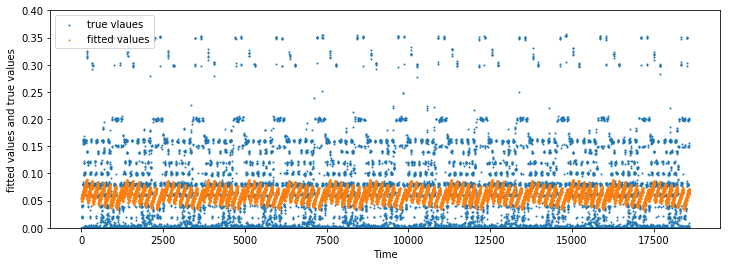

 residuals vs. ﬁtted values 


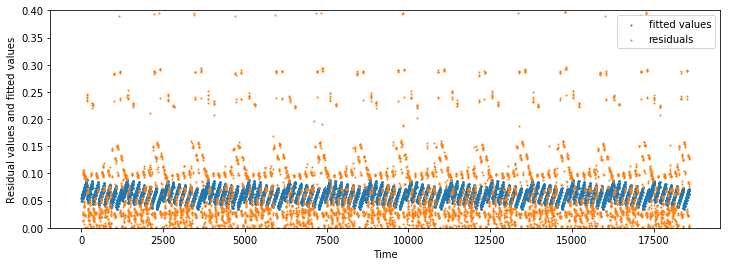

In [5]:
linear_regression = linear_model.LinearRegression()
print_RMSEs_plot(X,y,linear_regression)

### a) ii  Data Preprocessing

Test RMSE with cross validation: 0.1036758
Train RMSE with cross validation: 0.1035854

Fitted values vs. true values 


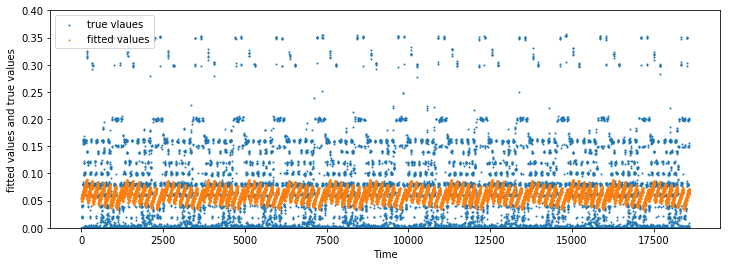

 residuals vs. ﬁtted values 


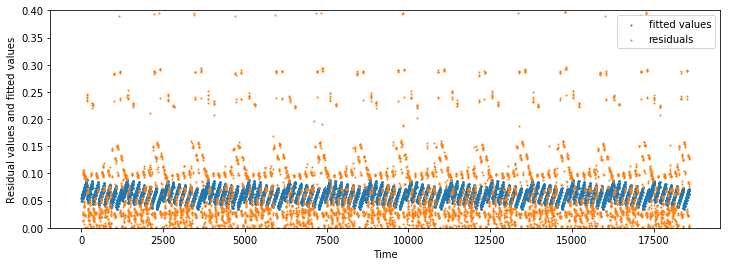

In [6]:
scalar=StandardScaler()
X_new=scalar.fit_transform(X,y)
print_RMSEs_plot(X_new,y,linear_regression)

### a) iii Feature Selection

In [7]:
model = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=5)
results = model.fit(X, y)
print(results.scores_)
print(X.keys())

[  8.45006257e-03   3.88163798e+01   1.50740934e+02   2.61386654e+01
   2.53200943e+01]
Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')


From f_regression, three most important variables are 'Backup Start Time - Hour of Day',  'Day of Week', 
and  'Work-Flow-ID'.

Use these three most important variables to train a new linear model


Test RMSE with cross validation: 0.1036707
Train RMSE with cross validation: 0.1035857

Fitted values vs. true values 


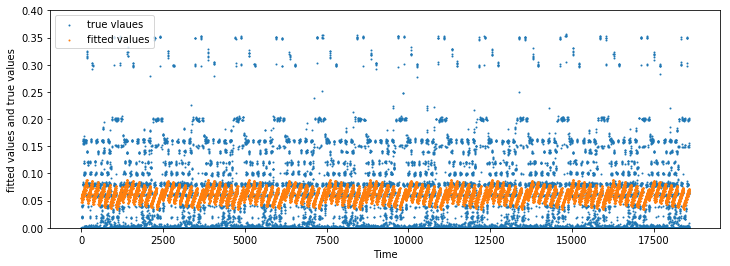

 residuals vs. ﬁtted values 


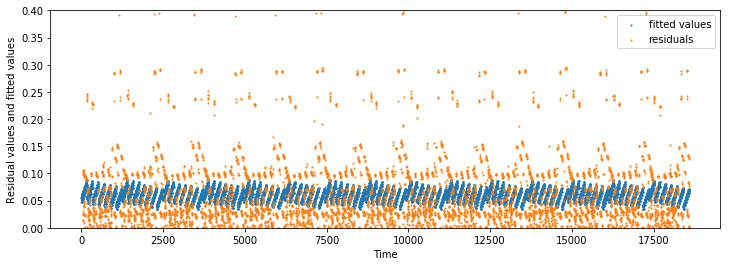

In [8]:
X_new=data[['Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID']]
y=data['Size of Backup (GB)']

print_RMSEs_plot(X_new,y,linear_regression)

In [9]:
model2 = feature_selection.SelectKBest(score_func=feature_selection.mutual_info_regression,k=5)
results2 = model2.fit(X, y)
print(X.keys())
print(results2.scores_)

C:\Users\Shijun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')
[ 0.          0.13874382  0.23581063  0.27474464  0.43690743]


In [10]:
# from mutual_info_regression, three moset important feature are 'Backup Start Time - Hour of Day',
# 'Work-Flow-ID', 'File Name'

Test RMSE with cross validation: 0.1037723
Train RMSE with cross validation: 0.1036945

Fitted values vs. true values 


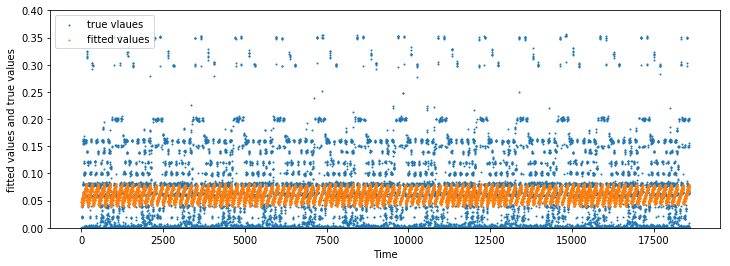

 residuals vs. ﬁtted values 


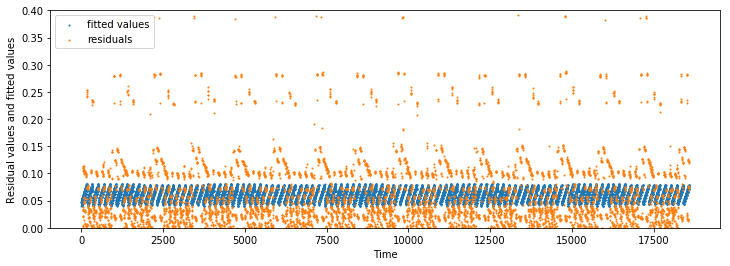

In [11]:
X_new=data[['Backup Start Time - Hour of Day','Work-Flow-ID', 'File Name']]
print_RMSEs_plot(X_new,y,linear_regression)

### a) iV Feature Encoding

In [4]:
from itertools import combinations
def combination_sets(x):
    return [c for i in range(len(x)+1) for c in combinations(x,i)]

X=data[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 
        'Work-Flow-ID','File Name']]

y=data['Size of Backup (GB)']
combos=combination_sets(range(5))

[(),
 (0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4),
 (0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 3, 4),
 (0, 2, 3, 4),
 (1, 2, 3, 4),
 (0, 1, 2, 3, 4)]

In [13]:

Test_RMSE=[]
Train_RMSE=[]
linear_regression = linear_model.LinearRegression()
for i in combos:
    if(i==()):
            cv_scores = cross_validate(linear_regression, X, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
            TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
            TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
            Test_RMSE.append(TestRMSE)
            Train_RMSE.append(TrainRMSE)
            
    else:
        hotendcode=OneHotEncoder(categorical_features=[i])
        X_temp=hotendcode.fit_transform(X).toarray()
        cv_scores = cross_validate(linear_regression, X_temp, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
        TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
        TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
        Test_RMSE.append(TestRMSE)
        Train_RMSE.append(TrainRMSE)

Train_RMSE vs. 32 combinations are following:
[0.10358539364277801, 0.10358051837324447, 0.10215359608015245, 0.10236175852542961, 0.091339545432358615, 0.091337254394577641, 0.10214938933986489, 0.10235581585803082, 0.091335201472383179, 0.091333444993687313, 0.10090650217866928, 0.089758836235244832, 0.089756770995530782, 0.089950969592270918, 0.089949857151125925, 0.091339009773964544, 0.10093868983839868, 0.089755430608224829, 0.089753752514710489, 0.089946290668393714, 0.089944986843500038, 0.091332627401957828, 0.0883402032189987, 0.088338047916612997, 0.089755706107983765, 0.089949125108059844, 0.088338304702925335, 0.088344561853200554, 0.089754110425724121, 0.089955556052689734, 0.088338821231760928, 0.088411390820096677]


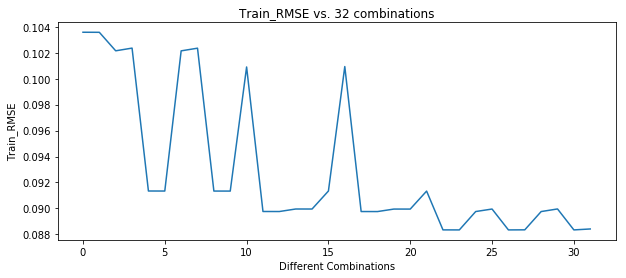

The min Train_RMSE is 0.088338
The best combos is
(1, 2, 4)



In [14]:

print('Train_RMSE vs. 32 combinations are following:')
print(Train_RMSE)
plt.figure(figsize=(10,4))
plt.plot(range(len(combos)),Train_RMSE)
plt.xlabel('Different Combinations')
plt.ylabel('Train_RMSE')
plt.title('Train_RMSE vs. 32 combinations')
plt.show()
print("The min Train_RMSE is %6f" %min(Train_RMSE))
min_index=np.argmin(Train_RMSE)
bestCombo=combos[min_index]
print("The best combos is")
print(bestCombo)
print('')

In [15]:
#From Train_RMSE,Best combination is using One Hot encoder for 'Day of Week', 'Backup Start Time - Hour of Day','File Name'
# and use scalar encoding for 'Week #', 'Work-Flow-ID'

Test_RMSE vs. 32 combinations are following:
[0.10367584767599029, 9558225312.6202679, 0.10225284478866957, 0.10246960674859851, 0.091488380772748484, 0.091498257658707435, 15709588261.184202, 8299081859.8960543, 15134462810.381632, 16786772610.854691, 0.10100640877046463, 0.089908467092951583, 0.089911528397780022, 0.090124863170950059, 0.090123975218599994, 0.091494616675094828, 15971230702.008102, 19829907972.63131, 23757490461.424587, 13983792308.760498, 16011671692.885807, 5043374618.0179033, 0.088507800112404347, 0.08850649158293282, 0.089918278004823229, 0.090124070948554444, 16236872626.116634, 173837943289.38196, 20123477975.755009, 61958433842.652817, 0.088511062304987204, 1333701913816.7725]


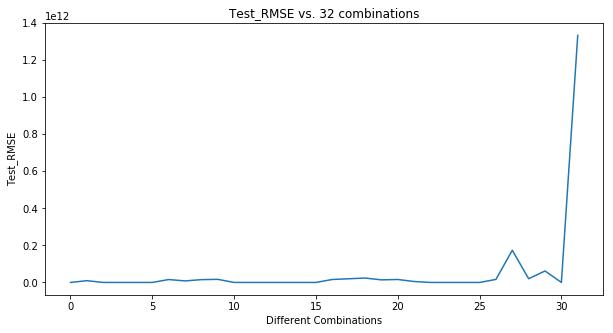

Note: Some points can not show in the graph since their values are super large compared with other points

The min Test_RMSE is 0.088506
The best combos is
(1, 2, 4)

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name'],
      dtype='object')


In [16]:

print('Test_RMSE vs. 32 combinations are following:')
print(Test_RMSE)
plt.figure(figsize=(10,5))
plt.plot(range(len(combos)),Test_RMSE)
plt.xlabel('Different Combinations')
plt.ylabel('Test_RMSE')
plt.title('Test_RMSE vs. 32 combinations')
plt.show()
print("Note: Some points can not show in the graph since their values are super large compared with other points")
print('')
print("The min Test_RMSE is %6f" %min(Test_RMSE))
min_index=np.argmin(Test_RMSE)
bestCombo=combos[min_index]
print("The best combos is")
print(bestCombo)
print('')
print(X.keys())

In [17]:
#Test_RMSE Conclusion: 
#Best combination is using One Hot encoder for 'Day of Week', 'Backup Start Time - Hour of Day','File Name'
# and use scalar encoding for 'Week #', 'Work-Flow-ID'
# find  obvious increases in test RMSE compared to training RMSE in some combinations
#since using one hot encoder make features increase significantly, over-fitting

Test RMSE with cross validation: 0.0885065
Train RMSE with cross validation: 0.0883380

Fitted values vs. true values 


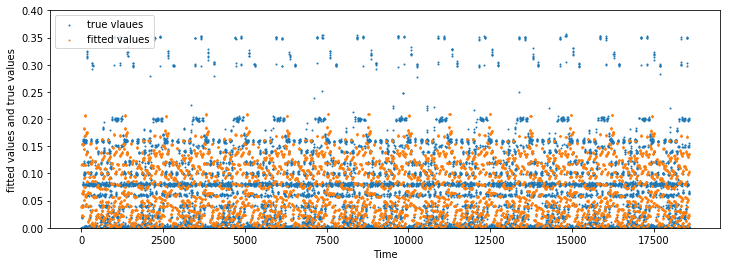

 residuals vs. ﬁtted values 


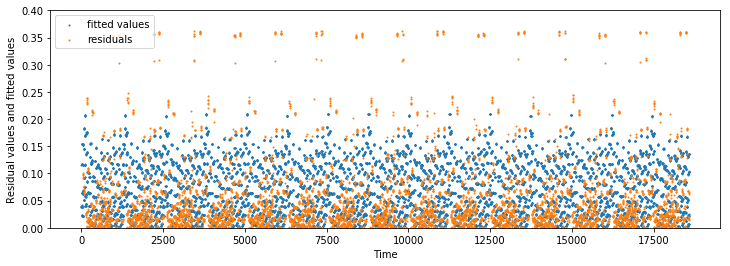

In [18]:
hotendcode=OneHotEncoder(categorical_features=[1,2,4])
X_temp=hotendcode.fit_transform(X).toarray()
print_RMSEs_plot(X_temp,y,linear_regression)

### a) v. Controlling ill-conditioning and over-ﬁting

#### for Ridge Regularizer

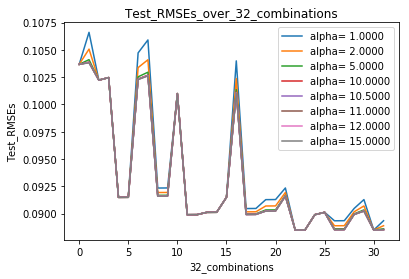

The lowest_Test_RMSE is 0.088504
with the alpha = 12.00000
and onehotencodeing combination is  (1, 2, 3)


In [14]:
from sklearn.linear_model import Ridge
alphas=[ 1, 2, 5,10, 10.5, 11, 12,15]

lowest_Test_RMSE=1
lowest_error_alpha=0
for a in alphas:
    Test_RMSE=[]
    Train_RMSE=[]
    clf = linear_model.Ridge(alpha=a)
    for i in combos:
        if(i==()): 
            cv_scores = cross_validate(clf, X, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
            TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
            TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
            Test_RMSE.append(TestRMSE)
            Train_RMSE.append(TrainRMSE)
            
        else:
            hotendcode=OneHotEncoder(categorical_features=[i])
            X_temp=hotendcode.fit_transform(X).toarray()
            cv_scores = cross_validate(clf, X_temp, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
            TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
            TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
            Test_RMSE.append(TestRMSE)
            Train_RMSE.append(TrainRMSE)
            
    
    plt.plot(range(len(combos)),Test_RMSE,label='alpha= %.4f'%a)
    
    if(lowest_Test_RMSE>min(Test_RMSE)):
        min_index=np.argmin(Test_RMSE)
        bestCombo=combos[min_index]
        lowest_Test_RMSE=min(Test_RMSE)
        lowest_error_alpha=a
        
plt.xlabel('32_combinations')
plt.ylabel('Test_RMSEs')        
plt.legend(loc='best')
plt.title('Test_RMSEs_over_32_combinations')
plt.show()

print("The lowest_Test_RMSE is %f" %lowest_Test_RMSE)
print("with the alpha = %0.5f"%lowest_error_alpha)
print("and onehotencodeing combination is ",bestCombo)

In [20]:
#  for Ridge Regularizer, after using different alpha values and make comparison of different results
#  find when alpha=12, apply one hot encoding for 'Day of Week', 'Backup Start Time - Hour of Day','Work-Flow-ID'
#  and scalar encoding for 'Week #', 'File Name', 
#  we can get the lowest Test-RMSE value, which equals to 0.088504

Test RMSE with cross validation: 0.0885040
Train RMSE with cross validation: 0.0883377

Fitted values vs. true values 


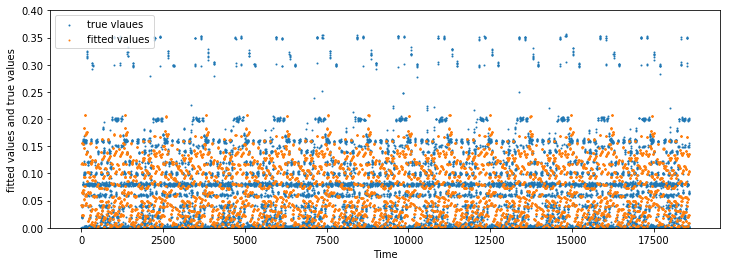

 residuals vs. ﬁtted values 


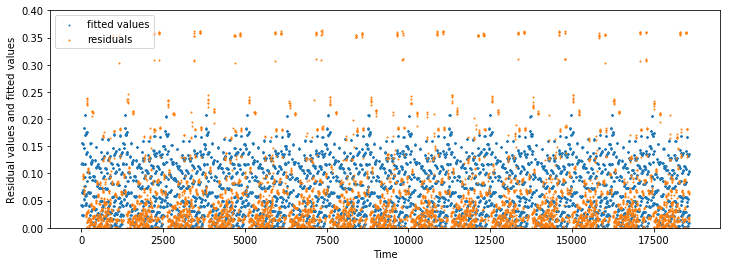

In [15]:
hotendcode=OneHotEncoder(categorical_features=[1,2,3])
X_temp=hotendcode.fit_transform(X).toarray()
clf = linear_model.Ridge(alpha=12)
print_RMSEs_plot(X_temp,y,clf)

#### for Lasso Regularizer

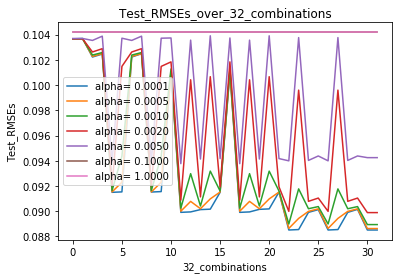

The lowest_Test_RMSE is 0.088508
with the alpha = 0.0001
and onehotencodeing combination is  (0, 1, 2, 3, 4)


In [11]:
from sklearn import linear_model
alphas=[0.0001,0.0005,0.001,0.002,0.005,0.1,1] 
clf = linear_model.Lasso(alpha=0.0001)
lowest_Test_RMSE=1
lowest_error_alpha=0
for a in alphas:
    
    Test_RMSE=[]
    Train_RMSE=[]
    clf = linear_model.Lasso(alpha=a)
    for i in combos:
        if(i==()): 
            cv_scores = cross_validate(clf, X, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
            TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
            TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
            Test_RMSE.append(TestRMSE)
            Train_RMSE.append(TrainRMSE)
            
        else:
            hotendcode=OneHotEncoder(categorical_features=[i])
            X_temp=hotendcode.fit_transform(X).toarray()
            cv_scores = cross_validate(clf, X_temp, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
            TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
            TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
            Test_RMSE.append(TestRMSE)
            Train_RMSE.append(TrainRMSE)
            
    
    plt.plot(range(len(combos)),Test_RMSE,label='alpha= %.4f'%a)
    
    if(lowest_Test_RMSE>min(Test_RMSE)):
        min_index=np.argmin(Test_RMSE)
        bestCombo=combos[min_index]
        lowest_Test_RMSE=min(Test_RMSE)
        lowest_error_alpha=a
        
plt.xlabel('32_combinations')
plt.ylabel('Test_RMSEs')        
plt.legend(loc='best')
plt.title('Test_RMSEs_over_32_combinations')
plt.show()

print("The lowest_Test_RMSE is %f" %lowest_Test_RMSE)
print("with the alpha = %0.4f"%lowest_error_alpha)
print("and onehotencodeing combination is ",bestCombo)

In [23]:
#  for  Lasso Regularizer, after using different alpha values and make comparison of different results
#  find when alpha=0.0001, apply one hot encoding for 'Week #','Day of Week', 'Backup Start Time - Hour of Day','Work-Flow-ID'
#  and 'File Name', 
#  we can get the lowest Test-RMSE value, which equals to 0.0885082492502

Test RMSE with cross validation: 0.0885082
Train RMSE with cross validation: 0.0883430

Fitted values vs. true values 


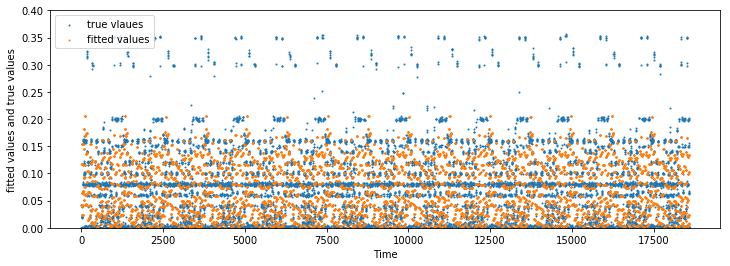

 residuals vs. ﬁtted values 


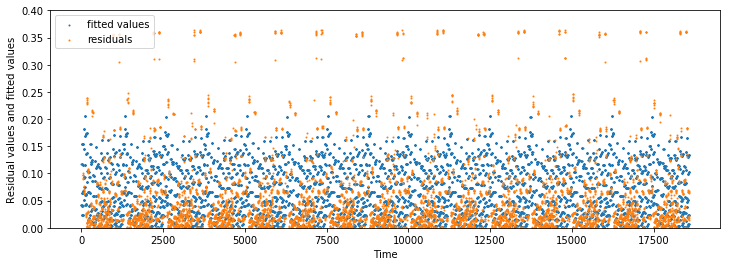

In [24]:
hotendcode=OneHotEncoder(categorical_features=[0,1,2,3,4])
X_temp=hotendcode.fit_transform(X).toarray()
clf = linear_model.Lasso(alpha=0.0001)
print_RMSEs_plot(X_temp,y,clf)

#### For Elastic Net Regularizer

In [38]:
alphas=[0.0001,0.0002,0.0005,0.001,0.002,0.005,0.1,1] 

from sklearn.linear_model import ElasticNet
#lambda1 =alpha*l1_ratio
#lambda2 =alpha*(1-l1_ratio)

clf = ElasticNet(alpha=10.0, l1_ratio=0.001)
Test_RMSE=[]
Train_RMSE=[]
for i in combos:
    if(i==()): 
        cv_scores = cross_validate(clf, X, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
        TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
        TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
        Test_RMSE.append(TestRMSE)
        Train_RMSE.append(TrainRMSE)
            
    else:
        hotendcode=OneHotEncoder(categorical_features=[i])
        X_temp=hotendcode.fit_transform(X).toarray()
        cv_scores = cross_validate(clf, X_temp, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
        TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
        TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
        Test_RMSE.append(TestRMSE)
        Train_RMSE.append(TrainRMSE)


        
        
min_index=np.argmin(Test_RMSE)
bestCombo=combos[min_index]

print(Test_RMSE)

print(min(Test_RMSE))
print(bestCombo)

[0.10381232743352208, 0.10381232743352208, 0.10381232743352208, 0.10418954520838064, 0.10373635568717796, 0.10381094896216378, 0.10381232743352208, 0.10418954520838064, 0.10373635568717796, 0.10381094896216378, 0.10418954520838064, 0.10373635568717796, 0.10381094896216378, 0.10411392152824926, 0.10419023788574096, 0.10372728590681632, 0.10418954520838064, 0.10373635568717796, 0.10381094896216378, 0.10411392152824926, 0.10419023788574096, 0.10372728590681632, 0.10411392152824926, 0.10419023788574096, 0.10372728590681632, 0.10410680674031308, 0.10411392152824926, 0.10419023788574096, 0.10372728590681632, 0.10410680674031308, 0.10410680674031308, 0.10410680674031308]
0.103727285907
(3, 4)


In [59]:
alphas=[1,2,5,10,15]
l1_ratios=[0.01,0.02,0.05,0.1, 0.5,0.9]
Min_Test_RMSE=[]
Min_Error_combo=[]
alpha_L1ratio=[]
for a in alphas:
    for l1 in l1_ratios:
        print("alpha = %d"%a , ", l1_ratio = %0.2f \n" %l1 )
        clf = ElasticNet(alpha=a, l1_ratio=l1)
        Test_RMSE=[]
        Train_RMSE=[]
        for i in combos:
            if(i==()): 
                cv_scores = cross_validate(clf, X, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
                TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
                TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
                Test_RMSE.append(TestRMSE)
                Train_RMSE.append(TrainRMSE)
            
            else:
                hotendcode=OneHotEncoder(categorical_features=[i])
                X_temp=hotendcode.fit_transform(X).toarray()
                cv_scores = cross_validate(clf, X_temp, y, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
                TestRMSE=(sum(cv_scores['test_score'])/-10.0)**0.5
                TrainRMSE=(sum(cv_scores['train_score'])/-10.0)**0.5
                Test_RMSE.append(TestRMSE)
                Train_RMSE.append(TrainRMSE)
                
        min_index=np.argmin(Test_RMSE)
        bestCombo=combos[min_index]
        
        print("The minimum Test_RMSE is %f" %min(Test_RMSE))
        print("The one hot encoding combination is: ")
        print(bestCombo,"\n")
        
        Min_Test_RMSE.append(min(Test_RMSE))
        Min_Error_combo.append(bestCombo)
        alpha_L1ratio.append([a,l1])

alpha = 1 , l1_ratio = 0.01 

The minimum Test_RMSE is 0.103080
The one hot encoding combination is: 
(3, 4) 

alpha = 1 , l1_ratio = 0.02 

The minimum Test_RMSE is 0.103817
The one hot encoding combination is: 
(4,) 

alpha = 1 , l1_ratio = 0.05 

The minimum Test_RMSE is 0.104033
The one hot encoding combination is: 
() 

alpha = 1 , l1_ratio = 0.10 

The minimum Test_RMSE is 0.104190
The one hot encoding combination is: 
() 

alpha = 1 , l1_ratio = 0.50 

The minimum Test_RMSE is 0.104190
The one hot encoding combination is: 
() 

alpha = 1 , l1_ratio = 0.90 

The minimum Test_RMSE is 0.104190
The one hot encoding combination is: 
() 

alpha = 2 , l1_ratio = 0.01 

The minimum Test_RMSE is 0.103821
The one hot encoding combination is: 
(4,) 

alpha = 2 , l1_ratio = 0.02 

The minimum Test_RMSE is 0.103945
The one hot encoding combination is: 
(4,) 

alpha = 2 , l1_ratio = 0.05 

The minimum Test_RMSE is 0.104190
The one hot encoding combination is: 
() 

alpha = 2 , l1_ratio = 0.10

In [60]:
min_error_index=np.argmin(Min_Test_RMSE)
min_combination=Min_Error_combo[min_error_index]
min_alpha_L1ratio=alpha_L1ratio[min_error_index]
print("When choose alpha and L1ratio equals to " , min_alpha_L1ratio)
print("and One hot encoding combination is",min_combination) # which corrsponding to Work-Flow-ID', 'File Name'
print("get the minimum Test_RMSE :%f" %min(Min_Test_RMSE))
#find that when lambda1 decrease, error decrese

When choose alpha and L1ratio equals to  [1, 0.01]
and One hot encoding combination is (3, 4)
get the minimum Test_RMSE :0.103080


Test RMSE with cross validation: 0.1030802
Train RMSE with cross validation: 0.1030681

Fitted values vs. true values 


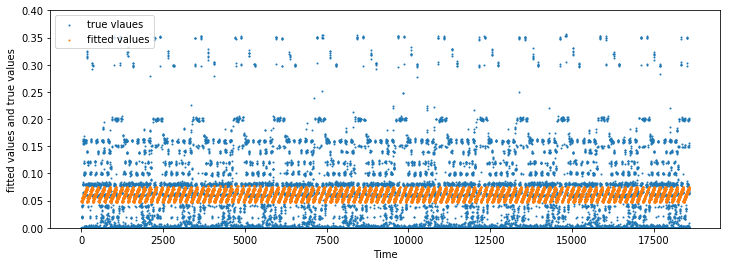

 residuals vs. ﬁtted values 


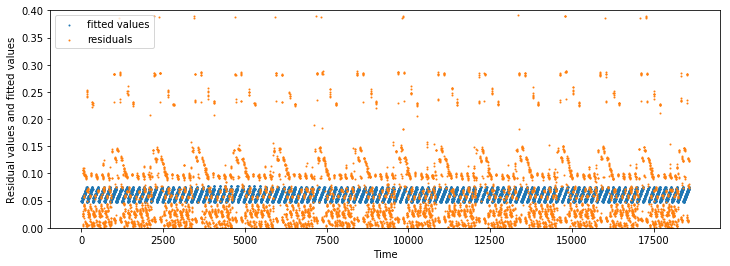

In [61]:
#lambda1 =alpha*l1_ratio
#lambda2 =alpha*(1-l1_ratio)

#lambda1=0.01, lambda2=0.99
clf = ElasticNet(alpha=1, l1_ratio=0.01)
hotendcode=OneHotEncoder(categorical_features=[3,4])
X_temp=hotendcode.fit_transform(X).toarray()
print_RMSEs_plot(X_temp,y,clf)